### __About The Data__

The data we'll be using comes from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Abalone), and contains the following attributes about abalone:

- Sex
- Length
- Diameter
- Height
- WHole weight
- Shucked weight
- Viscera weight
- Shell weight

### __Context__
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

### __Part 1. Importing Libraries__

In [1]:
# Data Cleaning and Plotting Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Data Analysis Libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

### __Part 2. Reading and Understanding the Data__
 
Import the data using Pandas into a dataframe named `abalone_df`. Then, display the first 5 rows

In [2]:
abalone_df = pd.read_csv('abalone.csv')
abalone_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Print some basic statistics of the data

In [3]:
abalone_df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [4]:
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


There are 4177 rows and 9 columns. The columns include 1 categorical predictor (sex), 7 continuous predictors (Length, Diameter, Height, Whole weight, Shucked weight, Viscera weight, Shell weight), and an integer response variable (number of rings)

### __Exploring the Data with Distributions__

Start exploring the data by plotting some histograms of different quantities. Once we do that, we'll get a better idea of how they are distributed amongst the population of abalones sampled for this data set.

<Axes: xlabel='Rings', ylabel='Count'>

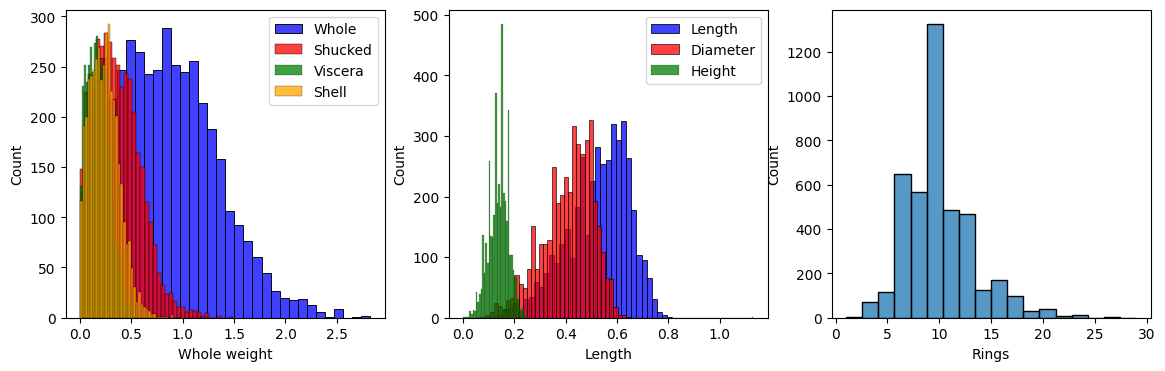

In [5]:
fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.histplot(abalone_df['Whole weight'],   label='Whole',   ax=ax1, color='blue')
sns.histplot(abalone_df['Shucked weight'], label='Shucked', ax=ax1, color='red')
sns.histplot(abalone_df['Viscera weight'], label='Viscera', ax=ax1, color='green')
sns.histplot(abalone_df['Shell weight'],   label='Shell',   ax=ax1, color='orange')
ax1.legend()

sns.histplot(abalone_df['Length'],   label='Length', ax=ax2, color='blue')
sns.histplot(abalone_df['Diameter'], label='Diameter', ax=ax2, color='red')
sns.histplot(abalone_df['Height'],   label='Height', ax=ax2, color='green')
ax2.legend()

sns.histplot(abalone_df['Rings'], bins=18, ax=ax3)

It is worth noting that we also have a "Sex" column that indicates whether the abalone is a male, a female, or an infant. We would expect infants to be significantly different from adults, so we'll split the data into the infant and adult groups, and look at histograms for each.

In [6]:
print(abalone_df['Sex'].value_counts())

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64


The distribution of Males, Females, and Infants are not too different, Males are about 37%, Females and Infants about 32%.

<Axes: xlabel='Rings', ylabel='Count'>

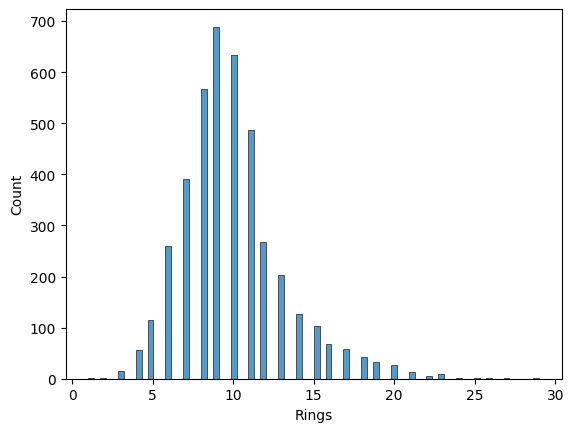

In [7]:
sns.histplot(abalone_df['Rings'], label='Rings')

From the histogram of the target variable ‘Rings’(skew =1.113) we can see the ‘Rings’ distribution has a right skew. More than 91% of the data lie below 14 Rings, giving rise to the tail in the distribution.

### __Part 3. Data Cleaning and Preperation for Analysis__

In [8]:
abalone_df = abalone_df[abalone_df['Height'] != 0]

In [9]:
label_encoder = LabelEncoder()
abalone_df['Sex'] = label_encoder.fit_transform(abalone_df['Sex'])
print(label_encoder.classes_)

['F' 'I' 'M']


<Axes: >

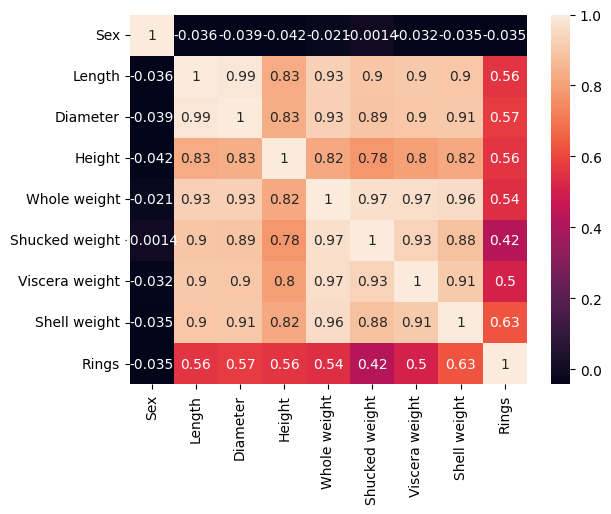

In [10]:
correlation = abalone_df.corr()
sns.heatmap(correlation, annot=True)

In [11]:
correlation['Rings'].sort_values()

Sex              -0.034663
Shucked weight    0.420597
Viscera weight    0.503562
Whole weight      0.540151
Length            0.556464
Height            0.557625
Diameter          0.574418
Shell weight      0.627928
Rings             1.000000
Name: Rings, dtype: float64

From the above image we see that Sex has a very low negative correlation, it looks like Sex will not have much value in the prediction of the output variable. To get a better correlation, the Sex column is dropped, and an IsAdult column based on the Sex column is created. The correlation with the new variable IsAdult is shown below.

<Axes: >

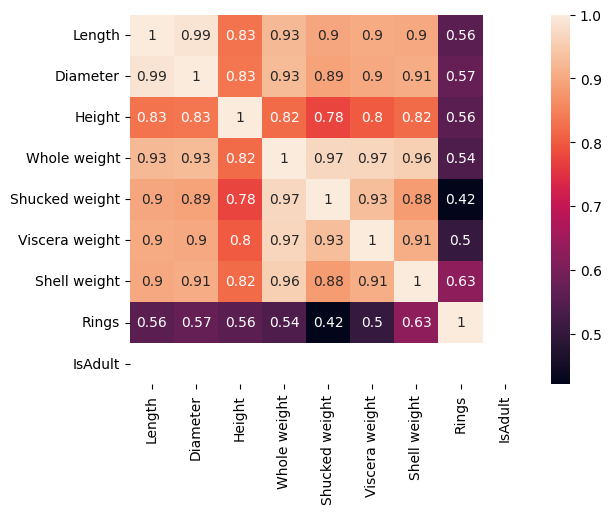

In [12]:
abalone_df['IsAdult'] = abalone_df['Sex'].apply(lambda x: 1 if x != 'I' else 0)
abalone_df.drop('Sex', axis=1, inplace=True)
correlation = abalone_df.corr()
sns.heatmap(correlation, annot=True)

In [13]:
correlation['Rings'].sort_values()

Shucked weight    0.420597
Viscera weight    0.503562
Whole weight      0.540151
Length            0.556464
Height            0.557625
Diameter          0.574418
Shell weight      0.627928
Rings             1.000000
IsAdult                NaN
Name: Rings, dtype: float64

Now, after adding isAdult column and dropping the ‘Sex’ column, we see a better correlation to the target variable ‘Rings’.

In [14]:
y = abalone_df['Rings']
X = abalone_df.drop('Rings', axis=1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)

In [16]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

### __Part 4: Model Creation and Evaluation__

In [17]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [18]:
# predict the test set results with criterion gini index
y_pred_gini = clf_gini.predict(X_test)

we'll import sklearn's accuracy_score to evaluate our model. This will take the true values and predictions as input.

In [19]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.2719


Let's also compare the train-set and test-set accuracy and check for overfitting.

In [20]:
y_pred_train_gini = clf_gini.predict(X_train)
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.2674
Test set score: 0.2719


Here, the training-set accuracy score is 0.2674 while the test-set accuracy is 0.2719. These two values are quite comparable, so there is no sign of overfitting.

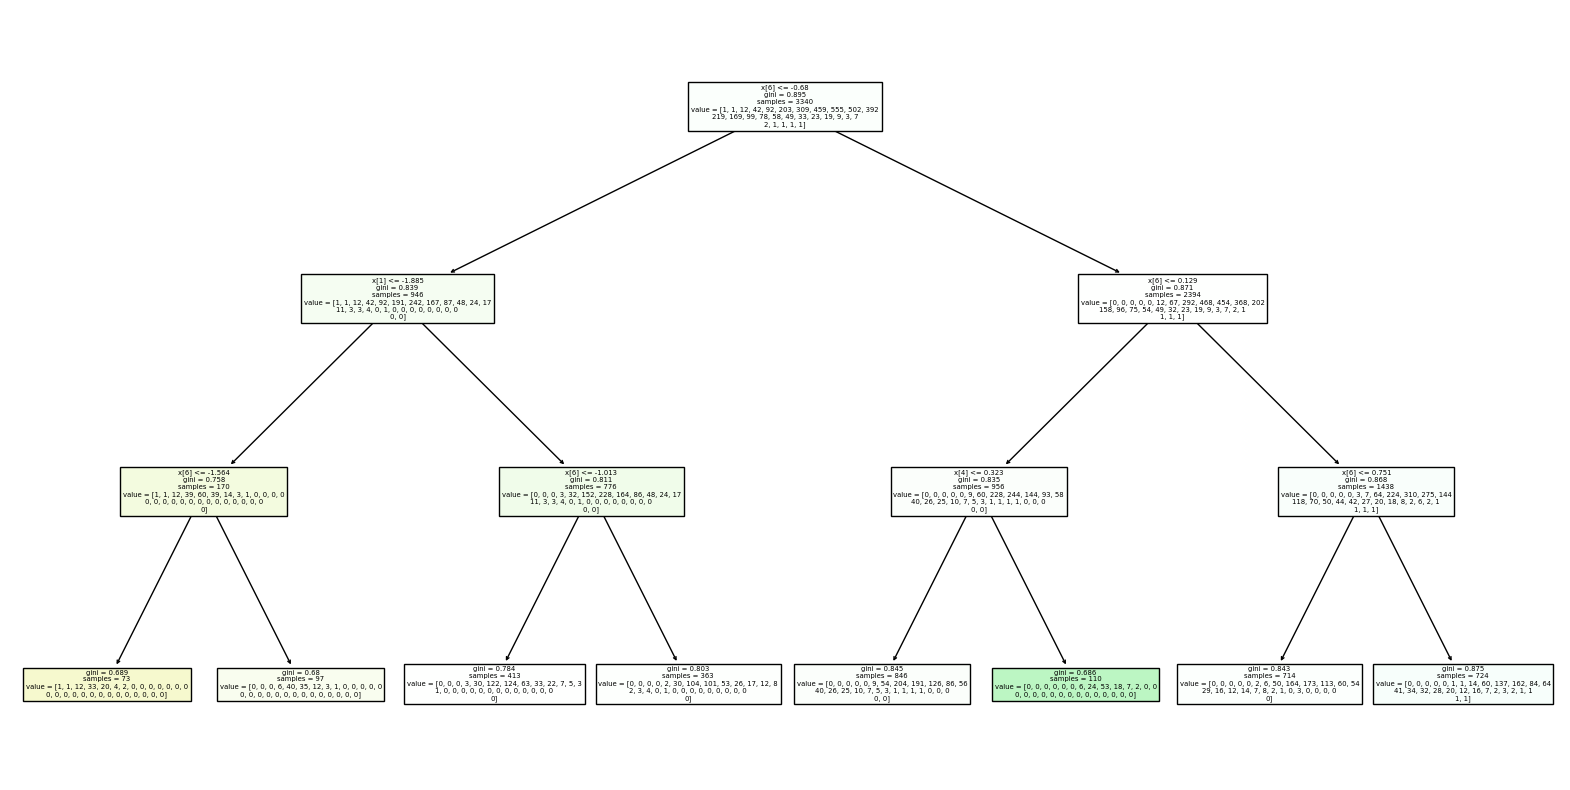

In [21]:
from sklearn import tree

plt.figure(figsize=(20, 10))
tree.plot_tree(clf_gini, filled=True) 
plt.show()

In [23]:
print(y_pred_gini)

[10  7  7  8 10  7 11  8 11 11  7 11  8 11 11 11  7  7  7  7  7  7  7  9
 11 11 11  8  7 10 11  8  7  8  7 10  8 11  7  4  9  7 10  7  8  7  4  7
 11  8 10 10  8  8  7 11  8 11  8 11 10  7  8  8 11 11  7  7 11 10 11  7
  8 10 11  7 11  5  4  4  7 11 11 10 10 10 11 11  8  8  8  7 10 11 11  8
  8  7  8 10  8 10 11 10  4  4  5  7 11  8 10  8  7 10  5  8  8  7  5  7
  9  5  5 11  8  8 11 11 10  7 10  8 11  8  8 10  8 11  5  8 10  7  9  7
 11  8  7 11 11  7 11 11  7 10  8  8  8  8  8  8  7 10  8 10  8 10  5 10
  7  8 10 10  8 11  8 11  8  9 10 11 10  8  8  7  8 10 10 11 11 10  5  8
 11 10  8 10 10  9 11  8  8  7 11  7  7 10 11 10 10 11  7  8 11  4 10 10
  7  8 11  8  9 11 11  7  8  7  8  8 10 10 10  5 10  7  7 10  7  7 10 10
 11  8 11  7 11 11 10 10 11  7  8  8 11 10  9  9 11  8 10 11  7  7  7  8
 10  5  8  8 10 11 11 11  8  8 11 10  8  8  7  7 10 11  8 10 10 10 11 11
 10  8  7  8  7  8 11  7 11  8 11  8  8  7  8 10 11 11  7  8 11  7  7  7
 11 11 10  4  8  8 11  7 11 10  4 10  8 11 11  8  8